In [1]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results
from post_processing import best_PCA, get_training_times, get_training_rand_scores, get_best_estimators, execute_estimators, get_testing_times, get_testing_rand_scores, get_n_clusters_testing, get_labels
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA, plot_clusters, plot_testing_time_vs_PCA

Loading the results of the tuning phase.

In [2]:
gaussian_mixture = load_tuning_results("GaussianMixture")
gaussian_mixture

{2: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.839151149439951,
  4.052321195602417),
 12: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8401750184982012,
  3.839906930923462),
 22: (GaussianMixture(covariance_type='diag', max_iter=200, n_components=15,
                  random_state=1),
  {'init_params': 'kmeans', 'n_components': 15},
  0.8372634398999821,
  6.547507047653198),
 32: (GaussianMixture(covariance_type='diag', init_params='random_from_data',
                  max_iter=200, n_components=15, random_state=1),
  {'init_params': 'random_from_data', 'n_components': 15},
  0.8313019671880182,
  8.185797929763794),
 42: (GaussianMixture(covariance_type='diag', init_params='random_from_data',
                  max_iter=200, n_components=15, random_state=

Now we search for the PCA dimension corresponding to the best rand score.

Recall: gaussian_mixture is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['init_params' : value, 'n_components' : value], rand score, training time).

In [3]:
best_PCA(gaussian_mixture)

The best PCA dimension is 12, with hyperparameters =  {'init_params': 'kmeans', 'n_components': 15}


In [4]:
training_rand_scores = get_training_rand_scores(gaussian_mixture)
training_rand_scores

[0.839151149439951,
 0.8401750184982012,
 0.8372634398999821,
 0.8313019671880182,
 0.8225896333528946,
 0.821923940499579,
 0.8211595055239457,
 0.8186597606715484,
 0.8068532008266782,
 0.8085022325415252,
 0.8081514556170746,
 0.8003608169826244,
 0.8068732809430255,
 0.7912740157681218,
 0.7949284055826296,
 0.7993541959023295,
 0.8010048733192152,
 0.7970057025489246,
 0.8038394356135024,
 0.7968267547776388,
 0.8271212461408926]

In [5]:
training_times = get_training_times(gaussian_mixture)
training_times

[4.052321195602417,
 3.839906930923462,
 6.547507047653198,
 8.185797929763794,
 11.584955930709839,
 12.121771097183228,
 13.517406940460205,
 13.695307970046997,
 15.15396785736084,
 17.159058809280396,
 18.614891052246094,
 20.238881826400757,
 28.051939725875854,
 25.486502170562744,
 27.358335971832275,
 32.91746211051941,
 35.071181774139404,
 34.97044110298157,
 39.93830108642578,
 43.411508083343506,
 40.465912103652954]

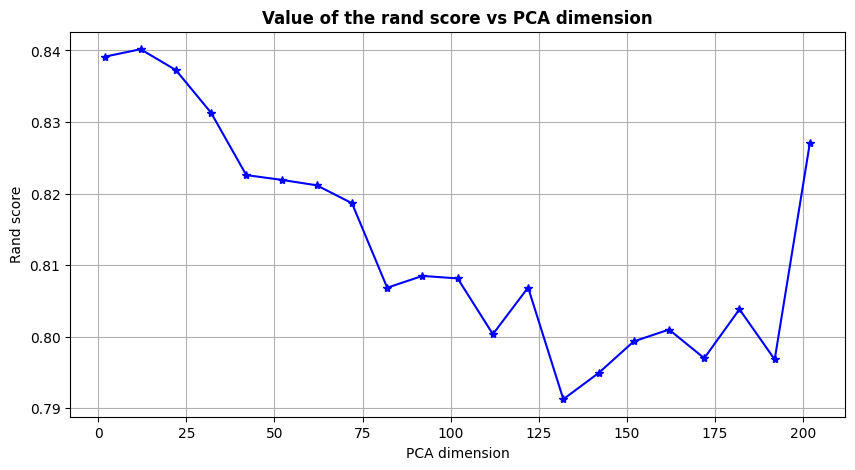

In [6]:
pca_dimensions = range(2,200+10,10)
plot_rand_score_vs_PCA(pca_dimensions, training_rand_scores)

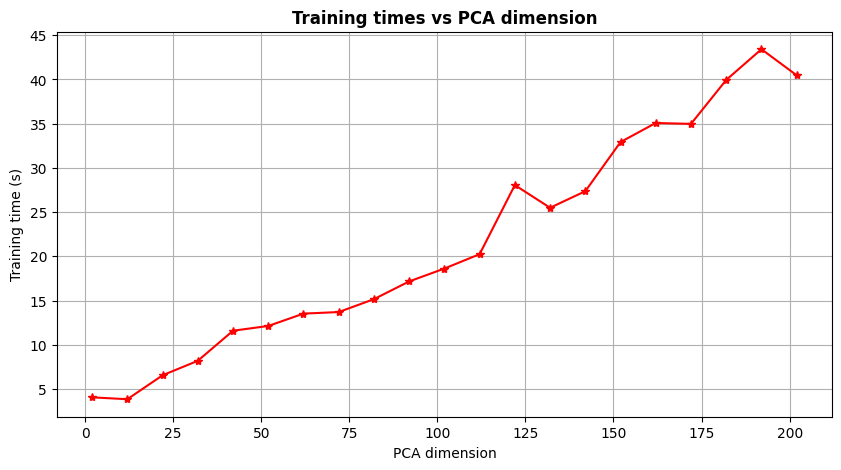

In [7]:
plot_training_time_vs_PCA(pca_dimensions, training_times)

In [8]:
best_estimators = get_best_estimators(gaussian_mixture)

In [9]:
testing_results = execute_estimators(best_estimators, "GaussianMixture", 200, 0.5)
testing_results

Executing GaussianMixture ..: 100%|██████████| 21/21 [00:00<00:00, 108.85it/s]


{2: (0.8392455656930582,
  0.002514362335205078,
  15,
  array([ 5, 12,  1, ...,  6,  4,  1])),
 12: (0.8390301471638806,
  0.011461019515991211,
  15,
  array([ 5,  8, 14, ...,  4,  8,  1])),
 22: (0.8332305431388157,
  0.002343893051147461,
  15,
  array([ 2,  3,  4, ..., 14,  4,  0])),
 32: (0.8335254015879819,
  0.001798868179321289,
  15,
  array([10,  1, 14, ...,  4,  5,  0])),
 42: (0.8060741738615721,
  0.0019021034240722656,
  15,
  array([ 2,  1, 13, ...,  8,  1, 12])),
 52: (0.8152811217929092,
  0.021973133087158203,
  15,
  array([ 8,  8, 12, ...,  3, 12, 11])),
 62: (0.7971984161002592,
  0.0026078224182128906,
  15,
  array([10,  7, 12, ...,  4,  7,  7])),
 72: (0.8161051170575389,
  0.008511066436767578,
  15,
  array([ 1,  6,  1, ..., 14,  1,  2])),
 82: (0.81450754189374,
  0.005173921585083008,
  15,
  array([ 1,  0,  0, ..., 13,  6,  0])),
 92: (0.7897808258322617,
  0.0032989978790283203,
  15,
  array([13, 10,  6, ..., 10,  3,  5])),
 102: (0.7984889678117282,
  0

In [10]:
testing_rand_scores = get_testing_rand_scores(testing_results)
testing_rand_scores

[0.8392455656930582,
 0.8390301471638806,
 0.8332305431388157,
 0.8335254015879819,
 0.8060741738615721,
 0.8152811217929092,
 0.7971984161002592,
 0.8161051170575389,
 0.81450754189374,
 0.7897808258322617,
 0.7984889678117282,
 0.7860985446900578,
 0.8013726042495867,
 0.7926791582470966,
 0.7596495009491152,
 0.8102692221337742,
 0.7967296960790317,
 0.7876227624354499,
 0.7916968138305472,
 0.7845348927397792,
 0.8328033800747046]

In [11]:
testing_times = get_testing_times(testing_results)
testing_times

[0.002514362335205078,
 0.011461019515991211,
 0.002343893051147461,
 0.001798868179321289,
 0.0019021034240722656,
 0.021973133087158203,
 0.0026078224182128906,
 0.008511066436767578,
 0.005173921585083008,
 0.0032989978790283203,
 0.009660959243774414,
 0.003587007522583008,
 0.0038530826568603516,
 0.0042209625244140625,
 0.005013942718505859,
 0.014086246490478516,
 0.0051081180572509766,
 0.006638765335083008,
 0.015363693237304688,
 0.014243125915527344,
 0.006425142288208008]

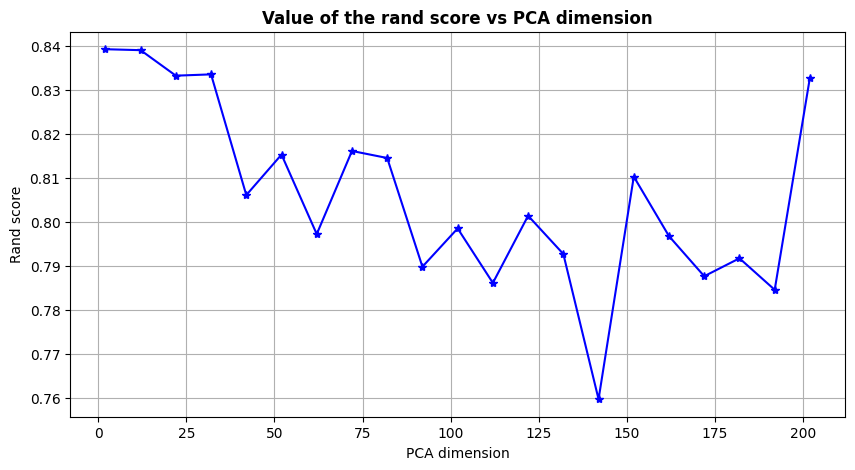

In [12]:
pca_dimensions = range(2,200+10,10)
plot_rand_score_vs_PCA(pca_dimensions, testing_rand_scores)

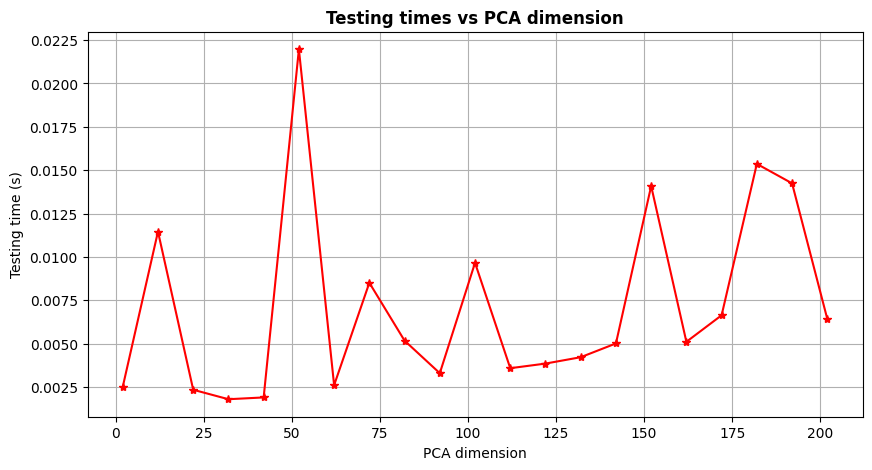

In [13]:
plot_testing_time_vs_PCA(pca_dimensions, testing_times)

In [14]:
labels = get_labels(testing_results)
labels

[array([ 5, 12,  1, ...,  6,  4,  1]),
 array([ 5,  8, 14, ...,  4,  8,  1]),
 array([ 2,  3,  4, ..., 14,  4,  0]),
 array([10,  1, 14, ...,  4,  5,  0]),
 array([ 2,  1, 13, ...,  8,  1, 12]),
 array([ 8,  8, 12, ...,  3, 12, 11]),
 array([10,  7, 12, ...,  4,  7,  7]),
 array([ 1,  6,  1, ..., 14,  1,  2]),
 array([ 1,  0,  0, ..., 13,  6,  0]),
 array([13, 10,  6, ..., 10,  3,  5]),
 array([ 8,  8,  8, ..., 10,  6,  1]),
 array([ 0,  5, 10, ...,  0,  4,  5]),
 array([ 2,  8,  7, ..., 12,  4,  6]),
 array([10, 11,  9, ..., 10, 10,  5]),
 array([ 9,  4,  0, ..., 12,  7,  4]),
 array([ 6,  7, 10, ...,  0, 10,  6]),
 array([13,  0, 12, ...,  7,  5, 10]),
 array([ 2,  0,  1, ..., 13, 13,  3]),
 array([ 5,  9, 11, ...,  0, 11,  2]),
 array([13, 13,  9, ..., 13,  9, 11]),
 array([5, 7, 4, ..., 7, 7, 7])]

In [15]:
n_clusters = get_n_clusters_testing(testing_results)
n_clusters

[15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 15,
 15,
 13,
 15,
 15,
 14,
 15,
 15,
 15]

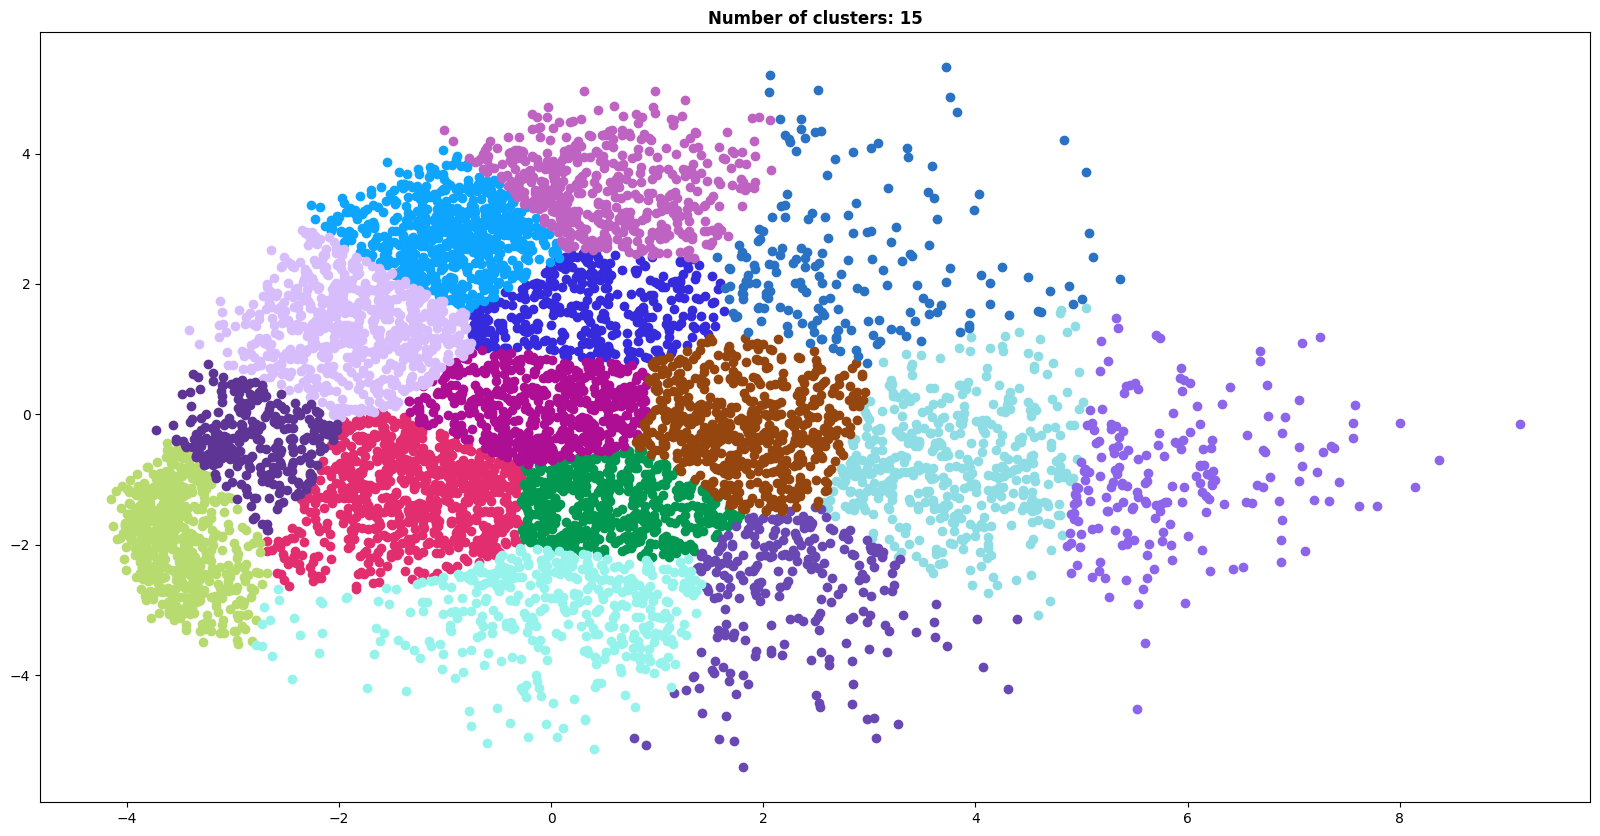

In [16]:
plot_clusters(0.5, n_clusters=n_clusters[0], labels=labels[0])